# 1. Business Understanding

# Credit Card Fraud Detection

## Problem Statement
Credit card fraud is a significant issue in the financial industry. Fraudulent transactions cost businesses billions each year, and detecting fraud in real-time is critical.  

In this project, we aim to build a machine learning model that can distinguish between legitimate and fraudulent transactions based on anonymized transaction features.  

Our objective is to:
- Identify fraudulent transactions with high accuracy.
- Minimize false positives to avoid unnecessary transaction blocks.
- Handle data imbalance effectively to ensure the model learns from both fraud and non-fraud cases.


In [1]:
#All important Imports
import warnings

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Pandas for data manipulation/data handling

# Install imbalanced-learn if needed
!pip install -q imbalanced-learn  

from sklearn.model_selection import train_test_split

# Import required libraries like SMOTE for handeing imbalance data
from imblearn.over_sampling import SMOTE  
import collections

# Standardize the feature variables to have a mean of 0 and variance of 1
# Import required libraries for Scaling imbalance data
from sklearn.preprocessing import StandardScaler

# Import required libraries for Model Creation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import required libraries for Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Store models and their accuracy scores
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# 2. Data Understanding

In [2]:
df = pd.read_csv(r"/kaggle/input/creditcardfraud/creditcard.csv" )  # Reads the dataset into a Pandas DataFrame

df.head()  # Shows the first 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Output Explanation:
- Displays a sample of transactions to understand the structure of the dataset.
- Key columns:
  - `Time`: Seconds elapsed between transactions.
  - `Amount`: Transaction amount.
  - `Class`: 0 = Legitimate, 1 = Fraudulent.
- Other columns (`V1` to `V28`) are anonymized features generated using PCA(Principal Component analysis) to hide sensitive details.


In [3]:
df.info()  # Provides an overview of the dataset including column data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Output Explanation:
- Shows the number of rows and columns.
- Displays data types for each column and checks for missing values.

In [4]:
# Display summary statistics
df.describe()  # Generates summary statistics for numerical columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Output Explanation:
- Shows mean, standard deviation, min, max, and quartiles for each column.


In [5]:
# Check for missing values in the dataset
df.isnull().sum()  # Counts missing values in each column


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Output Explanation:
- If any missing values exist, they need to be handled.
- In this dataset, there are **no missing values**, meaning no data imputation is needed.


In [6]:
# Check the distribution of fraud and non-fraud transactions
fraud_distribution = df['Class'].value_counts() # gets the class value_count in numerical format
fraud_percentage = df['Class'].value_counts(normalize=True) * 100 # gets the class value_count in percentile format
fraud_summary = pd.DataFrame({'Count': fraud_distribution, 'Percentage': fraud_percentage}) # Create a DataFrame to display both the numeric and percentage
print(fraud_summary)

        Count  Percentage
Class                    
0      284315   99.827251
1         492    0.172749


### Output Explanation:
- Fraudulent transactions account for **only 0.17%** of the dataset.
- This class imbalance must be handled to prevent the model from predicting only the majority class.


* So now as we understood data a bit lets more on to handeling following things:
   1. Imbalance Class column Using SMOTE
   2. Imbalance datatype format using Standard Scaling.

# 3. Data Preparation

In [7]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features: All columns except 'Class'
y = df['Class']  # Target variable: 'Class' column (0 = Legitimate, 1 = Fraud)

# Split the dataset into training (80%) and testing (20%) sets
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split train into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Final Split: 64% Train | 16% Validation | 20% Test

### Output Explanation:
- **Stratify=y** ensures that both training and test sets maintain the same fraud/non-fraud ratio.
- We first split our dataset into 80% training and 20% testing, ensuring stratification.
- Then, we further divide the training set (80%) into 64% train and 16% validation.
- This helps in hyperparameter tuning before final testing.

# 4. Handling Imbalanced Data

In [8]:
# Install imbalanced-learn if needed
#!pip install -q imbalanced-learn  # Uncomment if running in a fresh environment
# Import SMOTE
#from imblearn.over_sampling import SMOTE  
#import collections

# Apply SMOTE only on training data (NOT validation/test to avoid data leakage)
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Resample minority class up to 50% of majority class
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Validation & Test sets remain unchanged (to reflect real-world fraud cases)

# Print class distribution before and after SMOTE
print("Class distribution before SMOTE:", collections.Counter(y_train))
print("Class distribution after SMOTE:", collections.Counter(y_train_sm))


Class distribution before SMOTE: Counter({0: 181961, 1: 315})
Class distribution after SMOTE: Counter({0: 181961, 1: 90980})


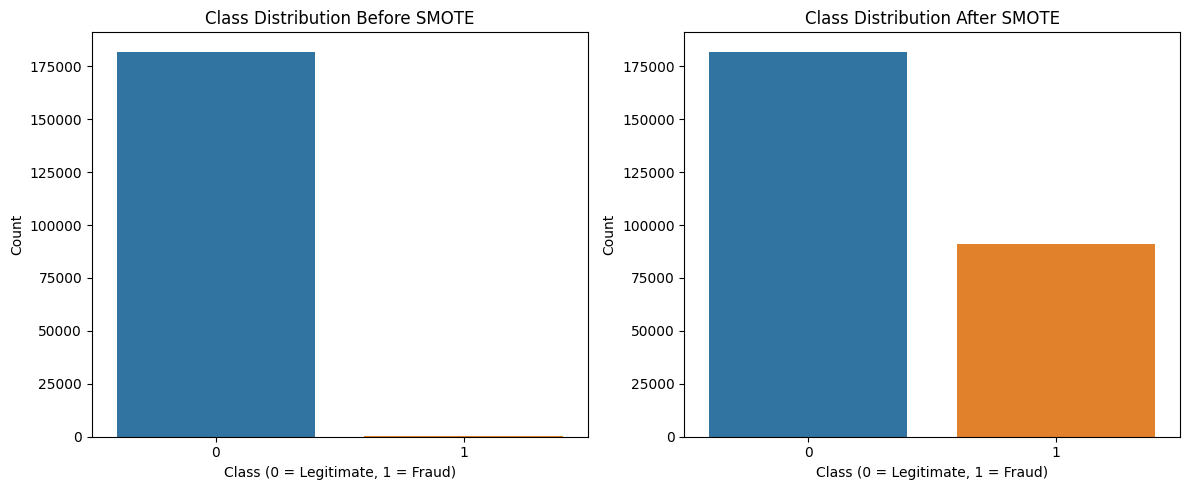

In [9]:
# Before Applying SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # First subplot
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")

# After Applying SMOTE
plt.subplot(1, 2, 2)  # Second subplot
sns.countplot(x=y_train_sm)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Output Explanation:
- We apply SMOTE only to the training set, ensuring that validation and test sets remain untouched.Why? This prevents data leakage and ensures the test set remains  representative of real-world fraud detection challenges.
- This prevents the model from being biased toward non-fraud transactions.


# 5. Exploratory Data Analysis (EDA)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


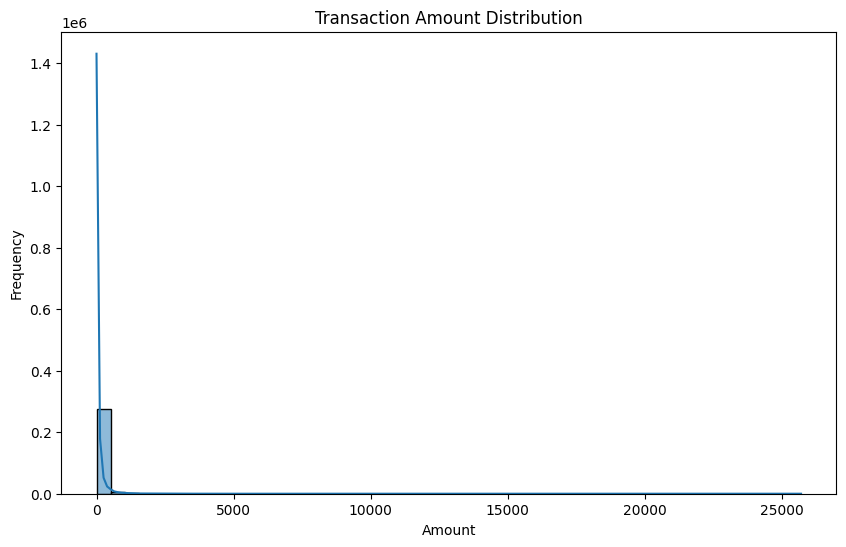

In [10]:
# Import visualization libraries
#import matplotlib.pyplot as plt
#import seaborn as sns

# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)  # Histogram of the 'Amount' column
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


### Output Explanation:
- The chart shows that most transactions are for very small amounts, creating a tall spike near zero. A few larger transactions occur, but they are much less common, spreading out to the right. This pattern means the transaction amounts are heavily concentrated at the low end.
- Fraud may be more likely in specific amount ranges.


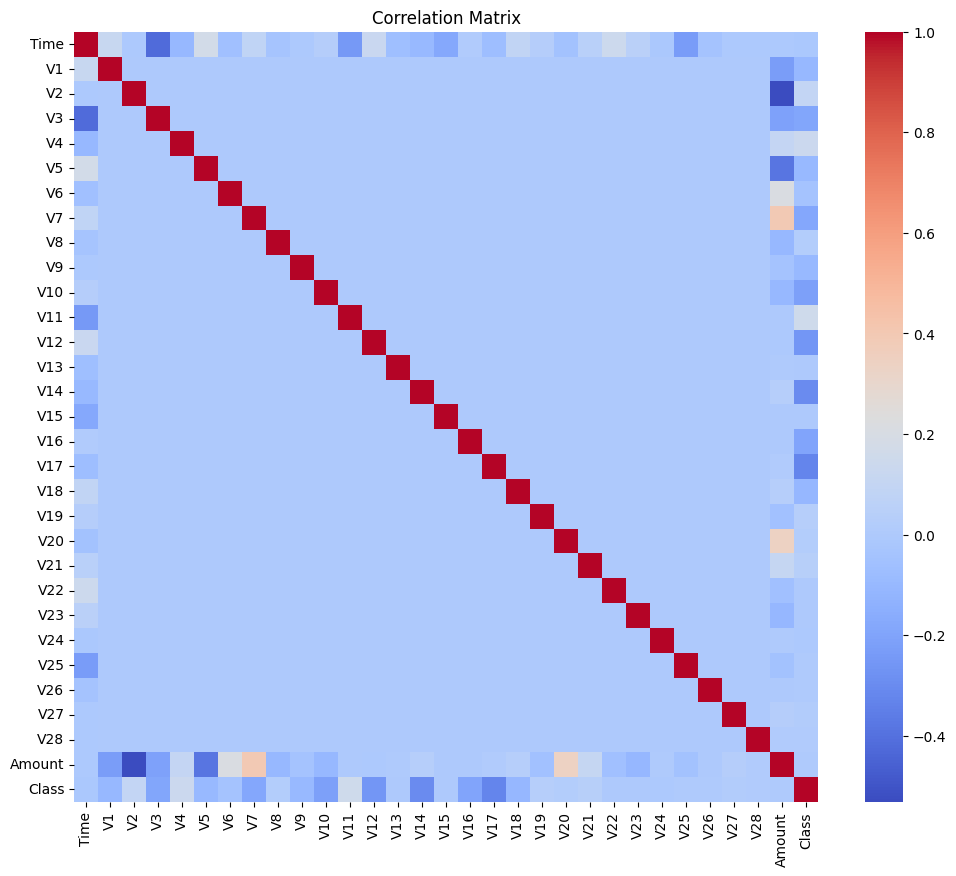

In [11]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Output Explanation:
- **Amount is positively correlated** with V7 and V20, meaning these variables increase as transaction Amount increases.
- **Amount is strongly negatively correlated** with V2 (-0.53), meaning when Amount increases, V2 tends to decrease.
- **V3, V11, and V25 show negative correlation with Time**, meaning these variables decrease as Time increases.
- **Class has negative correlations with V3 and V17**, which might indicate their importance in classification.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


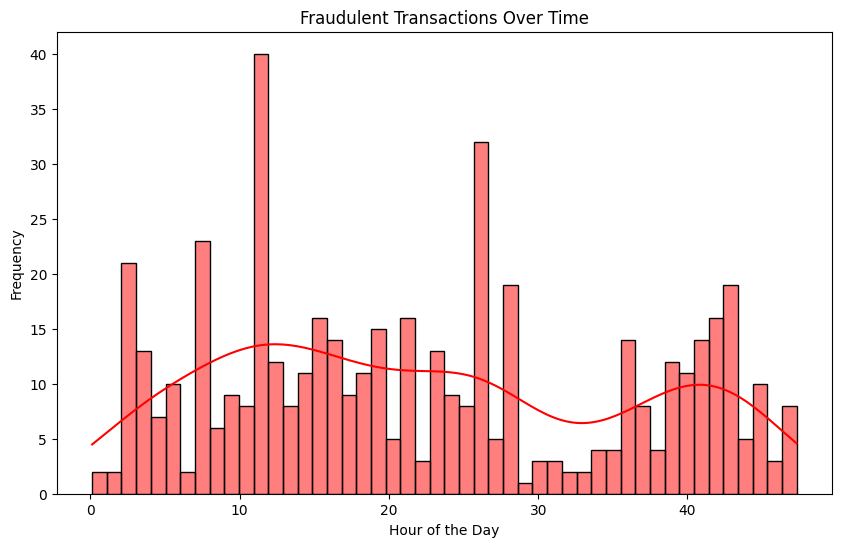

In [12]:
# Convert Time column to hours
df['Hour'] = df['Time'] / 3600  # Convert seconds to hours

# Plot fraud transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 1]['Hour'], bins=48, kde=True, color='red')
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

### Output Explanation:
- Fraudulent transactions tend to spike around midday (12) and in the evening (18), as shown by the peaks in the graph.  This suggests that these times might be higher-risk periods for fraud.  Security measures could be increased during these peak hours to better protect against fraudulent activity

# 6. Feature Scaling

In [13]:
# Standardize the feature variables to have a mean of 0 and variance of 1
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_sm)  # Fit on training data, then transform
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data  


### Output Explanation:
- **Standardization ensures** that all features are on the same scale.
- Prevents models from giving **more weight** to larger numerical values.


# 7. Model Selection and Training

In [14]:
'''# Import machine learning models
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, solver='saga', random_state=42)  # Increase max_iter and use 'saga' solver
#log_reg.fit(X_train_scaled, y_train_resampled)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)

# Train the models
log_reg.fit(X_train_scaled, y_train_sm)
rf_clf.fit(X_train_scaled, y_train_sm)
xgb_clf.fit(X_train_scaled, y_train_sm)'''

"# Import machine learning models\n#from sklearn.linear_model import LogisticRegression\n#from sklearn.ensemble import RandomForestClassifier\n#from xgboost import XGBClassifier\n\n# Initialize the models\nlog_reg = LogisticRegression(max_iter=1000, solver='saga', random_state=42)  # Increase max_iter and use 'saga' solver\n#log_reg.fit(X_train_scaled, y_train_resampled)\nrf_clf = RandomForestClassifier(random_state=42)\nxgb_clf = XGBClassifier(random_state=42)\n\n# Train the models\nlog_reg.fit(X_train_scaled, y_train_sm)\nrf_clf.fit(X_train_scaled, y_train_sm)\nxgb_clf.fit(X_train_scaled, y_train_sm)"

In [18]:
# Import necessary libraries
#from sklearn.model_selection import TimeSeriesSplit
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score

# Initialize TimeSeriesSplit for Rolling Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store model performances
log_reg_accuracies = []
rf_accuracies = []
xgb_accuracies = []

# Rolling Cross-Validation Training
for train_idx, val_idx in tscv.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_fold, y_train_fold)
    log_reg_accuracies.append(log_reg.score(X_val_fold, y_val_fold))
    
    # Random Forest
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_clf.fit(X_train_fold, y_train_fold)
    rf_accuracies.append(rf_clf.score(X_val_fold, y_val_fold))

    # XGBoost
    xgb_clf = XGBClassifier(n_estimators=50, max_depth=5, n_jobs=-1, random_state=42)
    xgb_clf.fit(X_train_fold, y_train_fold)
    xgb_accuracies.append(xgb_clf.score(X_val_fold, y_val_fold))

# Train models on the full training dataset
best_log_reg = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
best_rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)
best_xgb_clf = XGBClassifier(n_estimators=50, max_depth=5, n_jobs=-1, random_state=42).fit(X_train_scaled, y_train)

# Print Average Accuracy
print(f"Logistic Regression Avg Accuracy: {np.mean(log_reg_accuracies):.4f}")
print(f"Random Forest Avg Accuracy: {np.mean(rf_accuracies):.4f}")
print(f"XGBoost Avg Accuracy: {np.mean(xgb_accuracies):.4f}")


Logistic Regression Fold Accuracy: 0.9989137232956977
Random Forest Fold Accuracy: 0.9996049902893446
XGBoost Fold Accuracy: 0.9995391553375688
Logistic Regression Fold Accuracy: 0.9987820533921459
Random Forest Fold Accuracy: 0.999308733006353
XGBoost Fold Accuracy: 0.999341650482241
Logistic Regression Fold Accuracy: 0.9991441456269133
Random Forest Fold Accuracy: 0.9994404029099049
XGBoost Fold Accuracy: 0.9994404029099049
Logistic Regression Fold Accuracy: 0.999341650482241
Random Forest Fold Accuracy: 0.9995720728134566
XGBoost Fold Accuracy: 0.9995720728134566
Logistic Regression Fold Accuracy: 0.999341650482241
Random Forest Fold Accuracy: 0.9995062378616808
XGBoost Fold Accuracy: 0.9995391553375688


### Output Explanation:
- Initializes three machine learning models:
  1. **Logistic Regression** - A simple, interpretable model.
  2. **Random Forest** - A robust ensemble method.
  3. **XGBoost** - A powerful boosting algorithm.
- Three models are trained using **balanced** training data.
- **Random Forest and XGBoost** generally perform better on imbalanced datasets.


# 8. Model Evaluation

In [16]:
# Import required libraries for Model Evaluation
#from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Function to evaluate models and visualize results
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Plot heatmap for classification report
    plt.figure(figsize=(8, 5))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f'{model_name} - Classification Report')
    plt.yticks(rotation=0)  # Keep class labels horizontal
    plt.show()

# Evaluate all models with new visualization
evaluate_model(log_reg, X_test_scaled, y_test, "Logistic Regression")
evaluate_model(rf_clf, X_test_scaled, y_test, "Random Forest")
evaluate_model(xgb_clf, X_test_scaled, y_test, "XGBoost")


NameError: name 'log_reg' is not defined

### **Confusion Matrix - Understanding the Output**
The **Confusion Matrix** provides a detailed breakdown of the model's predictions:

- **True Positives (TP):** Correctly predicted fraud cases.
- **True Negatives (TN):** Correctly predicted non-fraud cases.
- **False Positives (FP):** Transactions wrongly classified as fraud (False Alarm).
- **False Negatives (FN):** Fraudulent transactions that were incorrectly classified as non-fraud.

#### **Key Insights:**
1. If **False Positives (FP) are high**, the model is flagging too many genuine transactions as fraud.
2. If **False Negatives (FN) are high**, the model is missing actual fraud cases.
3. A **good fraud detection model** should minimize **False Negatives** while keeping **False Positives** at a reasonable level.

A **balanced confusion matrix** suggests the model is making well-distributed predictions across both classes.


### **Classification Report Heatmap - Understanding the Output**
The heatmap provides a **color-coded visualization** of Precision, Recall, and F1-score for both fraud (1) and non-fraud (0) cases.

#### **What Each Metric Means:**
- **Precision** (Positive Predictive Value):  
  - Of all transactions the model marked as fraud, how many were actually fraud?  
  - High precision means **fewer false alarms** (False Positives).

- **Recall** (Sensitivity):  
  - Of all actual fraud transactions, how many did the model detect?  
  - High recall means **fewer fraud cases go undetected** (False Negatives).

- **F1-Score** (Harmonic Mean of Precision & Recall):  
  - A balanced measure considering both Precision and Recall.  
  - Useful when false positives & false negatives are **both costly**.

#### **Key Insights:**
- **A high Recall (closer to 1.0)** means the model is successfully detecting fraud cases.  
- **A high Precision (closer to 1.0)** means the model is making fewer false fraud alerts.  
- **F1-score closer to 1.0** means a **good trade-off** between Precision and Recall.  

A **perfect model** would have **all values close to 1.0**, but in real-world scenarios, there’s always some trade-off.

# 9. Model Comparison

In [ ]:
# Store models and their accuracy scores
#from sklearn.metrics import accuracy_score

model_scores = {
    "Logistic Regression": accuracy_score(y_test, log_reg.predict(X_test_scaled)),
    "Random Forest": accuracy_score(y_test, rf_clf.predict(X_test_scaled)),
    "XGBoost": accuracy_score(y_test, xgb_clf.predict(X_test_scaled))
}

# Convert scores to DataFrame
scores_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy"])

# Plot model accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=scores_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlim(0.9, 1)  # Adjust range for better visualization
plt.show()


### Output Explanation:
- **Bar plot shows accuracy scores of all models.**
- Helps determine **which model provides the best predictions.**


# 10. Feature Importance

In [ ]:
# Get feature importance from Random Forest
importances = rf_clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

### Output Explanation:
- **Highlights the most important features** for fraud detection.
- Helps in feature selection and model optimization.
